# Association Rule Mining

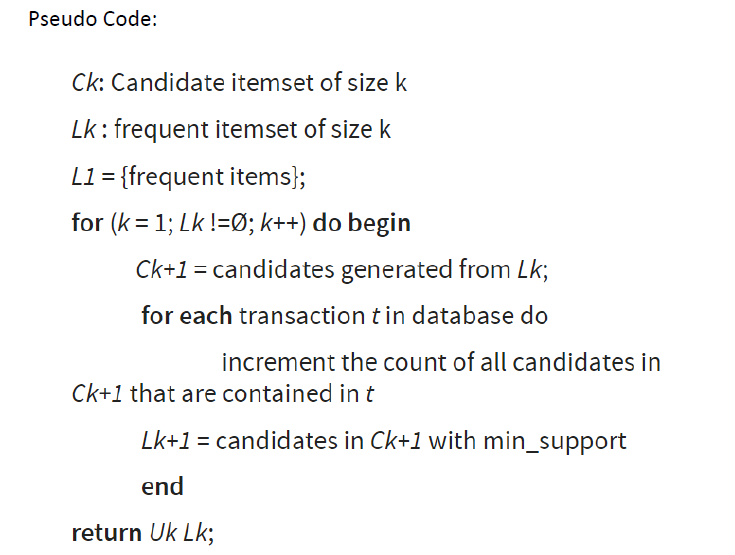

In [2]:
from IPython.display import Image
Image(filename='pseudocode.png') 

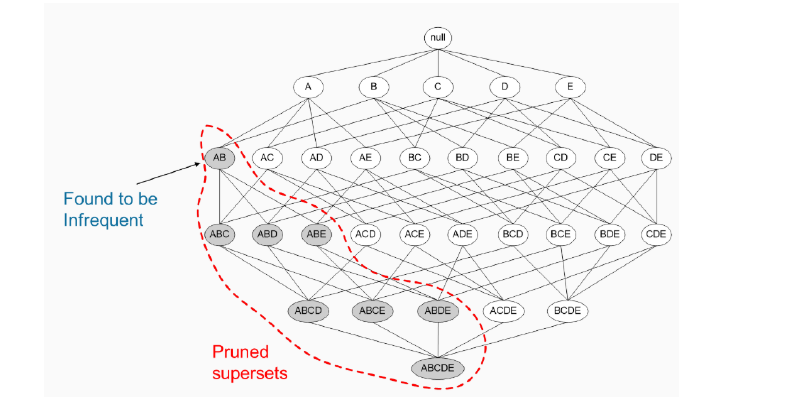

In [3]:
Image(filename='image.png') 

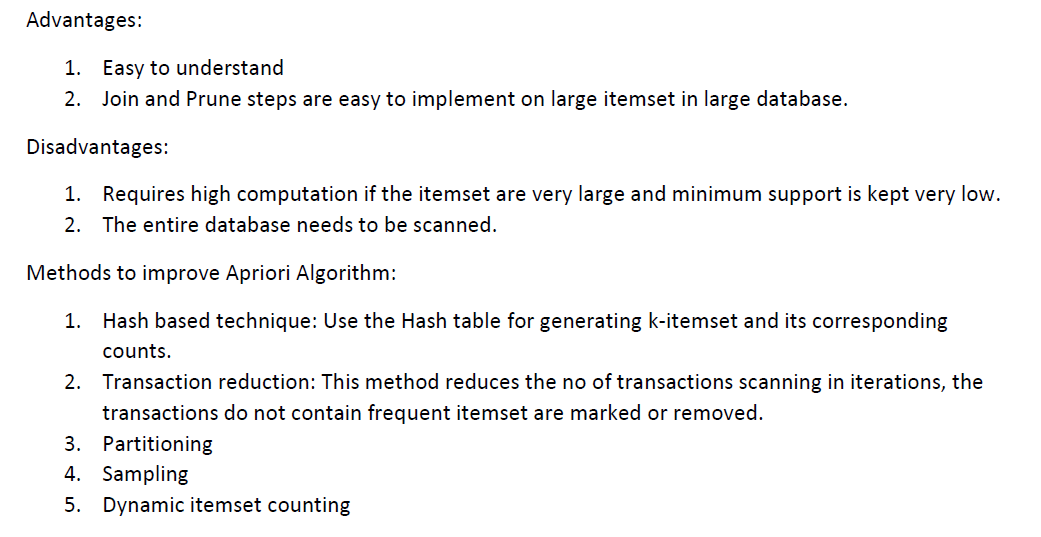

In [4]:
Image(filename='advantages&disadvantages.png') 

# Demo:


## Apriori on a Toy DataSet:

In [5]:
! pip install mlxtend

In [6]:
def loadDataSet():
    return [[1,3,4],[2,3,5],[1,2,3,5],[2,5]]

### Apriori Algorithm from scratch

In [7]:
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    return list(map(frozenset, C1))

In [13]:
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                if not can in ssCnt: ssCnt[can] = 1
                else: ssCnt[can] += 1
                    
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        supportData[key] = support
        if support >= minSupport:
            retList.insert(0,key)
    return retList,supportData

In [9]:
dataSet = loadDataSet()
dataSet

[[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5]]

In [10]:
C1 = createC1(dataSet)
C1

[frozenset({1}),
 frozenset({2}),
 frozenset({3}),
 frozenset({4}),
 frozenset({5})]

In [11]:
D = list(map(set,dataSet))
D

[{1, 3, 4}, {2, 3, 5}, {1, 2, 3, 5}, {2, 5}]

In [16]:
L1,suppDat0 = scanD(D,C1,0.6)
L1

[frozenset({5}), frozenset({2}), frozenset({3})]

In [17]:
suppDat0

{frozenset({1}): 0.5,
 frozenset({3}): 0.75,
 frozenset({4}): 0.25,
 frozenset({2}): 0.75,
 frozenset({5}): 0.75}

In [18]:
def aprioriGen(Lk, k):
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1,lenLk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1 == L2:
                retList.append(Lk[i] | Lk[j])  # set union
    return retList

In [19]:
def apriori(dataSet, minSupport):
    C1 = createC1(dataSet)
    D = list(map(set,dataSet))
    L1, supportData = scanD(D,C1,minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = aprioriGen(L[k-2],k)
        Lk, supK = scanD(D, Ck, minSupport)
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

In [27]:
def generateRules(L, supportData, minConf):
    bigRuleList = []
    for i in range(1,len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if i>1:
                rulesFromConseq(freqSet, H1, supportData, bigRuleList,minConf)
            else:
                prunedH = calcConf(freqSet,H1,supportData,bigRuleList,minConf)
    return bigRuleList                

In [28]:
def calcConf(freqSet, H, supportData,brl,minConf):
    prunedH = []
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet - conseq]
        if conf >= minConf:
            print(freqSet-conseq, " --> ", conseq, "conf: ", conf)
            brl.append((freqSet-conseq , conseq, conf))
            prunedH.append(conseq)
    return prunedH

In [29]:
def rulesFromConseq(freqSet, H, supportData, brl, minConf):
    m = len(H[0])
    if (len(freqSet) > (m+1)):
        Hmp1 = aprioriGen(H,m+1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData,brl,minConf)
        
        if (len(Hmp1) > 1):
            rulesFromConseq(freqSet, Hmp1, supportData,brl,minConf)

In [36]:
L, suppData = apriori(dataSet,minSupport=0.5)

In [39]:
rules = generateRules(L, suppData, minConf = 0.6)

frozenset({3})  -->  frozenset({2}) conf:  0.6666666666666666
frozenset({2})  -->  frozenset({3}) conf:  0.6666666666666666
frozenset({5})  -->  frozenset({3}) conf:  0.6666666666666666
frozenset({3})  -->  frozenset({5}) conf:  0.6666666666666666
frozenset({5})  -->  frozenset({2}) conf:  1.0
frozenset({2})  -->  frozenset({5}) conf:  1.0
frozenset({3})  -->  frozenset({1}) conf:  0.6666666666666666
frozenset({1})  -->  frozenset({3}) conf:  1.0
frozenset({5})  -->  frozenset({2, 3}) conf:  0.6666666666666666
frozenset({3})  -->  frozenset({2, 5}) conf:  0.6666666666666666
frozenset({2})  -->  frozenset({3, 5}) conf:  0.6666666666666666


In [40]:
rules

[(frozenset({3}), frozenset({2}), 0.6666666666666666),
 (frozenset({2}), frozenset({3}), 0.6666666666666666),
 (frozenset({5}), frozenset({3}), 0.6666666666666666),
 (frozenset({3}), frozenset({5}), 0.6666666666666666),
 (frozenset({5}), frozenset({2}), 1.0),
 (frozenset({2}), frozenset({5}), 1.0),
 (frozenset({3}), frozenset({1}), 0.6666666666666666),
 (frozenset({1}), frozenset({3}), 1.0),
 (frozenset({5}), frozenset({2, 3}), 0.6666666666666666),
 (frozenset({3}), frozenset({2, 5}), 0.6666666666666666),
 (frozenset({2}), frozenset({3, 5}), 0.6666666666666666)]

## Apriori Algorithm on Bread-Basket Data Set

In [41]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv("./BreadBasket_DMS.csv",delimiter=',')
df.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [50]:
df.columns

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')

In [51]:
df.loc[df['Item']=='NONE',:]

Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
...           ...       ...          ...   ...
21108  2017-04-08  11:54:22         9590  NONE
21122  2017-04-08  12:58:25         9599  NONE
21254  2017-04-09  12:01:07         9666  NONE
21255  2017-04-09  12:04:13         9667  NONE
21266  2017-04-09  12:31:28         9672  NONE

[786 rows x 4 columns]

In [52]:
df.drop(df.loc[df['Item']=='NONE',:].index,axis=0,inplace=True)

In [53]:
hot_encoded_df = df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [55]:
hot_encoded_df.head()

Item         Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
Transaction                                                                     
1                   0.0                       0.0        0.0              0.0   
2                   0.0                       0.0        0.0              0.0   
3                   0.0                       0.0        0.0              0.0   
4                   0.0                       0.0        0.0              0.0   
5                   0.0                       0.0        0.0              0.0   

Item         Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
Transaction                                                             ...   
1                 0.0    0.0       0.0       0.0           0.0     0.0  ...   
2                 0.0    0.0       0.0       0.0           0.0     0.0  ...   
3                 0.0    0.0       0.0       0.0           0.0     0.0  ...   
4                 0.0    0.0       0.0       0.0           0.0     0.0  ...   
5                 0.0    0.0       0.0       0.0           0.0     0.0  ...   

Item         The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  \
Transaction                                                         
1                 0.0        0.0     0.0    0.0       0.0     0.0   
2                 0.0        0.0     0.0    0.0       0.0     0.0   
3                 0.0        0.0     0.0    0.0       0.0     0.0   
4                 0.0        0.0     0.0    0.0       0.0     0.0   
5                 0.0        0.0     0.0    0.0       0.0     0.0   

Item         Valentine's card  Vegan Feast  Vegan mincepie  Victorian Sponge  
Transaction                                                                   
1                         0.0          0.0             0.0               0.0  
2                         0.0          0.0             0.0               0.0  
3                         0.0          0.0             0.0               0.0  
4                         0.0          0.0             0.0               0.0  
5                         0.0          0.0             0.0               0.0  

[5 rows x 94 columns]

In [56]:
def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [57]:
hot_encoded_df.head()

Item         Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
Transaction                                                                     
1                     0                         0          0                0   
2                     0                         0          0                0   
3                     0                         0          0                0   
4                     0                         0          0                0   
5                     0                         0          0                0   

Item         Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
Transaction                                                             ...   
1                   0      0         0         0             0       0  ...   
2                   0      0         0         0             0       0  ...   
3                   0      0         0         0             0       0  ...   
4                   0      0         0         0             0       0  ...   
5                   0      0         0         0             0       0  ...   

Item         The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  \
Transaction                                                         
1                   0          0       0      0         0       0   
2                   0          0       0      0         0       0   
3                   0          0       0      0         0       0   
4                   0          0       0      0         0       0   
5                   0          0       0      0         0       0   

Item         Valentine's card  Vegan Feast  Vegan mincepie  Victorian Sponge  
Transaction                                                                   
1                           0            0               0                 0  
2                           0            0               0                 0  
3                           0            0               0                 0  
4                           0            0               0                 0  
5                           0            0               0                 0  

[5 rows x 94 columns]

In [58]:
from mlxtend.frequent_patterns import apriori, association_rules

In [59]:
freq_itemsets = apriori(hot_encoded_df, min_support=0.01,use_colnames = True)

In [60]:
rules = association_rules(freq_itemsets, metric='lift')
rules.head(10)

antecedents  consequents  antecedent support  consequent support   support  \
0      (Bread)  (Alfajores)            0.327205            0.036344  0.010354   
1  (Alfajores)      (Bread)            0.036344            0.327205  0.010354   
2     (Coffee)  (Alfajores)            0.478394            0.036344  0.019651   
3  (Alfajores)     (Coffee)            0.036344            0.478394  0.019651   
4    (Brownie)      (Bread)            0.040042            0.327205  0.010777   
5      (Bread)    (Brownie)            0.327205            0.040042  0.010777   
6      (Bread)    (Cookies)            0.327205            0.054411  0.014474   
7    (Cookies)      (Bread)            0.054411            0.327205  0.014474   
8  (Medialuna)      (Bread)            0.061807            0.327205  0.016904   
9      (Bread)  (Medialuna)            0.327205            0.061807  0.016904   

   confidence      lift  leverage  conviction  
0    0.031644  0.870657 -0.001538    0.995145  
1    0.284884  0.870657 -0.001538    0.940818  
2    0.041078  1.130235  0.002264    1.004936  
3    0.540698  1.130235  0.002264    1.135648  
4    0.269129  0.822508 -0.002326    0.920538  
5    0.032935  0.822508 -0.002326    0.992651  
6    0.044236  0.813004 -0.003329    0.989354  
7    0.266019  0.813004 -0.003329    0.916638  
8    0.273504  0.835879 -0.003319    0.926082  
9    0.051663  0.835879 -0.003319    0.989304

In [62]:
rules[ (rules['lift'] > 1.1) & (rules['confidence'] > 0.6)]

antecedents consequents  antecedent support  consequent support   support  \
40     (Toast)    (Coffee)            0.033597            0.478394  0.023666   

    confidence      lift  leverage  conviction  
40    0.704403  1.472431  0.007593    1.764582